# Hello Introduction of Dataset

I have used two dataset
one is central-coast (1).xlsx

another is greater-newcastle (1).xlsx

they are different region in Sydney

# Questions
The Main question is 
How many buildings of these two different regions?

What are the types of buildings in these two different region? 

what types of buildings is the trend of these two different region due now?

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [4]:
%matplotlib inline

# start with newcastle

In [5]:
if os.path.isfile("greater-newcastle (1).xlsx"):
    filepath = "greater-newcastle (1).xlsx"
    print("loading from file")
else:
    filepath = "Sales-tables-September-2023-quarter - Postcode.csv"
    print("loading from the internet")

lga_df = pd.read_excel(filepath, sheet_name="LGA Approvals")
print("done")

loading from file
done


In [7]:
lga_df.head()

,Date,FY,Type_of_Building,LGA,Number_of_Dwellings,Density,Region
0,1/07/2016,2016-17,Alterations and Additions,Cessnock,0,Others,Greater Newcastle
1,1/07/2016,2016-17,Alterations and Additions,Lake Macquarie,0,Others,Greater Newcastle
2,1/07/2016,2016-17,Alterations and Additions,Maitland,0,Others,Greater Newcastle
3,1/07/2016,2016-17,Alterations and Additions,Newcastle,1,Others,Greater Newcastle
4,1/07/2016,2016-17,Alterations and Additions,Port Stephens,1,Others,Greater Newcastle


In [8]:
lga_df.sample(5)

,Date,FY,Type_of_Building,LGA,Number_of_Dwellings,Density,Region
3234,1/11/2021,2021-22,Houses,Port Stephens,35,Low Density,Greater Newcastle
4197,1/06/2023,2022-23,Townhouses 2+ storeys,Maitland,2,Medium Density,Greater Newcastle
861,1/12/2017,2017-18,Apartments 9+ storeys,Lake Macquarie,0,High Density,Greater Newcastle
466,1/04/2017,2016-17,Apartments 1-2 storeys,Lake Macquarie,0,Medium Density,Greater Newcastle
1304,1/09/2018,2018-19,Alterations and Additions,Port Stephens,0,Others,Greater Newcastle


In [9]:
lga_df.columns

Index(['Date', 'FY', 'Type_of_Building', 'LGA', 'Number_of_Dwellings',
       'Density', 'Region'],
      dtype='object')

In [10]:
row_one = lga_df.iloc[1]
row_one

Date                                   1/07/2016
FY                                       2016-17
Type_of_Building       Alterations and Additions
LGA                               Lake Macquarie
Number_of_Dwellings                            0
Density                                   Others
Region                         Greater Newcastle
Name: 1, dtype: object

# Place vs numbers of dwellings

<Axes: xlabel='LGA'>

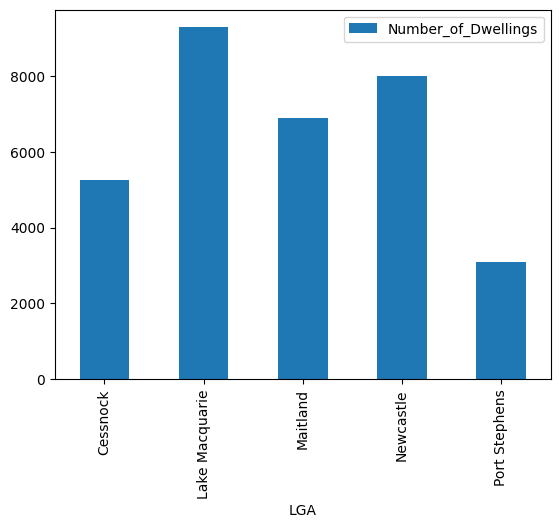

In [11]:
lga_df[["LGA", "Number_of_Dwellings"]].groupby("LGA").sum().plot(kind="bar")

In [12]:
lga_df.groupby("Type_of_Building").Number_of_Dwellings.mean()

Type_of_Building
Alterations and Additions     0.290476
Apartments 1-2 storeys        0.526190
Apartments 3 storeys          1.028571
Apartments 4-8 storeys        4.104762
Apartments 9+ storeys         5.021429
Conversions                   0.178571
Houses                       47.666667
Other Dwellings               0.033333
Townhouses 1 storey           9.854762
Townhouses 2+ storeys         8.773810
Name: Number_of_Dwellings, dtype: float64

In [13]:
lga_df.groupby("Type_of_Building").Number_of_Dwellings.max()

Type_of_Building
Alterations and Additions     26
Apartments 1-2 storeys        65
Apartments 3 storeys          31
Apartments 4-8 storeys       160
Apartments 9+ storeys        350
Conversions                   33
Houses                       159
Other Dwellings                3
Townhouses 1 storey          222
Townhouses 2+ storeys        135
Name: Number_of_Dwellings, dtype: int64

In [14]:
lga_df.groupby("Type_of_Building").Number_of_Dwellings.min()

Type_of_Building
Alterations and Additions    0
Apartments 1-2 storeys       0
Apartments 3 storeys         0
Apartments 4-8 storeys       0
Apartments 9+ storeys        0
Conversions                  0
Houses                       7
Other Dwellings              0
Townhouses 1 storey          0
Townhouses 2+ storeys        0
Name: Number_of_Dwellings, dtype: int64

In [15]:
lga_df.groupby("Type_of_Building").Number_of_Dwellings.agg(['count','min','max','mean'])

,count,min,max,mean
Type_of_Building,,,,
Alterations and Additions,420,0,26,0.290476
Apartments 1-2 storeys,420,0,65,0.526190
Apartments 3 storeys,420,0,31,1.028571
Apartments 4-8 storeys,420,0,160,4.104762
Apartments 9+ storeys,420,0,350,5.021429
Conversions,420,0,33,0.178571
Houses,420,7,159,47.666667
Other Dwellings,420,0,3,0.033333
Townhouses 1 storey,420,0,222,9.854762


# Mean 

<Axes: xlabel='LGA'>

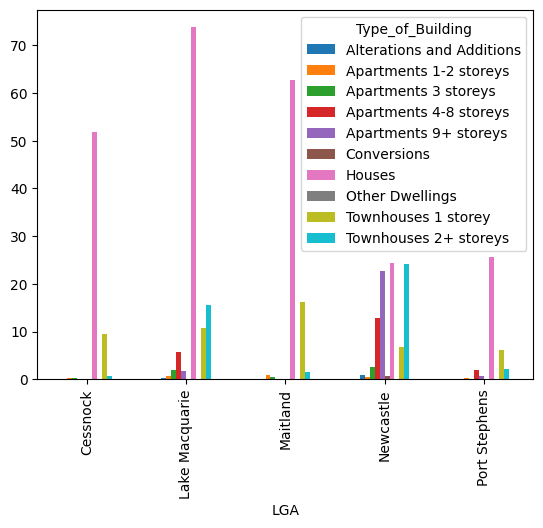

In [16]:
lga_df.groupby(["LGA","Type_of_Building"]).Number_of_Dwellings.mean().unstack().plot(kind='bar')

# Max

<Axes: xlabel='LGA'>

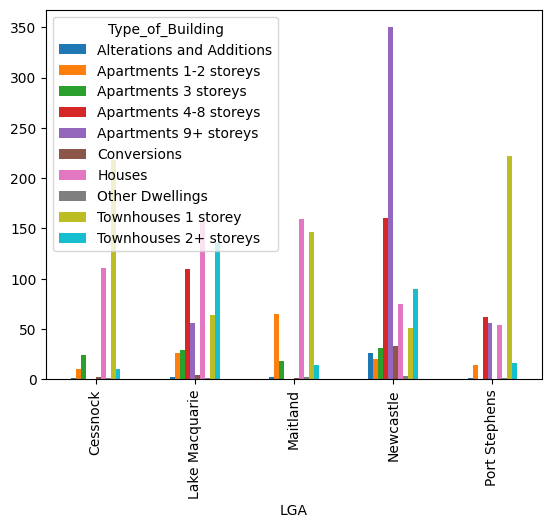

In [17]:
lga_df.groupby(["LGA","Type_of_Building"]).Number_of_Dwellings.max().unstack().plot(kind='bar')

# Then central coast

In [18]:
if os.path.isfile("central-coast (1).xlsx"):
    filepath = "central-coast (1).xlsx"
    print("loading from file")
else:
    filepath = "Sales-tables-September-2023-quarter - Postcode.csv"
    print("loading from the internet")

lga_df = pd.read_excel(filepath, sheet_name="SA2 Completions")
print("done")

loading from file
done


In [19]:
lga_df.head()

,Date,BuildingType,Additions,SA2_CODE21
0,2016-07-01,Apartments,1,102011028
1,2016-07-01,Houses,3,102011028
2,2016-07-01,"Semi-detached, row or terrace houses, townhouses",0,102011028
3,2016-10-01,Apartments,1,102011028
4,2016-10-01,Houses,3,102011028


In [20]:

lga_df.sample(5)

,Date,BuildingType,Additions,SA2_CODE21
1303,2017-01-01,Houses,5,102011038
633,2021-04-01,Apartments,1,102021048
1796,2022-01-01,"Semi-detached, row or terrace houses, townhouses",4,102011040
2030,2017-07-01,"Semi-detached, row or terrace houses, townhouses",0,102011043
1794,2022-01-01,Apartments,3,102011040


In [21]:
lga_df.columns

Index(['Date', 'BuildingType', 'Additions', 'SA2_CODE21'], dtype='object')

In [22]:
row_one = lga_df.iloc[1]
row_one

Date            2016-07-01
BuildingType        Houses
Additions                3
SA2_CODE21       102011028
Name: 1, dtype: object

# place code vs numbers of dwellings

<Axes: xlabel='SA2_CODE21'>

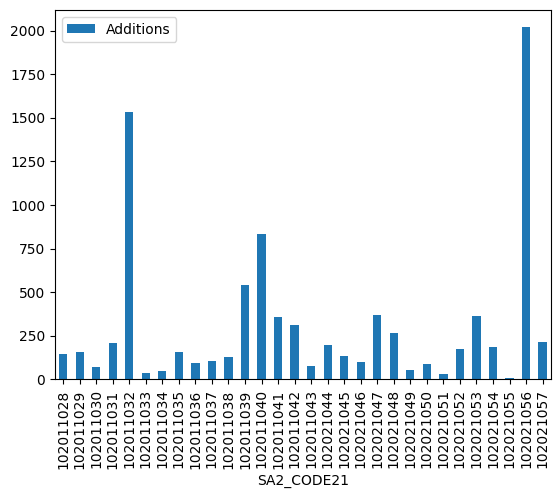

In [28]:
lga_df[["SA2_CODE21", "Additions"]].groupby("SA2_CODE21").sum().plot(kind="bar")

In [32]:
lga_df.groupby("Additions").SA2_CODE21.mean()

Additions
0      1.020157e+08
1      1.020161e+08
2      1.020151e+08
3      1.020155e+08
4      1.020159e+08
           ...     
102    1.020110e+08
118    1.020211e+08
120    1.020160e+08
166    1.020110e+08
271    1.020110e+08
Name: SA2_CODE21, Length: 69, dtype: float64

In [35]:
lga_df.groupby("SA2_CODE21").Additions.mean()

SA2_CODE21
102011028     2.055556
102011029     2.222222
102011030     1.000000
102011031     2.916667
102011032    21.263889
102011033     0.527778
102011034     0.708333
102011035     2.180556
102011036     1.291667
102011037     1.472222
102011038     1.777778
102011039     7.500000
102011040    11.555556
102011041     5.013889
102011042     4.333333
102011043     1.069444
102021044     2.722222
102021045     1.875000
102021046     1.361111
102021047     5.152778
102021048     3.722222
102021049     0.791667
102021050     1.222222
102021051     0.402778
102021052     2.388889
102021053     5.069444
102021054     2.625000
102021055     0.111111
102021056    28.027778
102021057     3.000000
Name: Additions, dtype: float64

In [36]:
lga_df.groupby("SA2_CODE21").Additions.min()

SA2_CODE21
102011028    0
102011029    0
102011030    0
102011031    0
102011032    0
102011033    0
102011034    0
102011035    0
102011036    0
102011037    0
102011038    0
102011039    0
102011040    2
102011041    0
102011042    0
102011043    0
102021044    0
102021045    0
102021046    0
102021047    0
102021048    0
102021049    0
102021050    0
102021051    0
102021052    0
102021053    0
102021054    0
102021055    0
102021056    0
102021057    0
Name: Additions, dtype: int64

In [37]:
lga_df.groupby("SA2_CODE21").Additions.max()

SA2_CODE21
102011028     27
102011029      9
102011030      5
102011031     58
102011032    271
102011033      3
102011034     12
102011035     26
102011036      8
102011037     55
102011038     17
102011039     76
102011040     94
102011041     49
102011042     15
102011043      5
102021044     10
102021045     23
102021046      6
102021047     69
102021048     15
102021049      4
102021050      6
102021051      2
102021052     13
102021053     46
102021054     34
102021055      1
102021056    120
102021057     26
Name: Additions, dtype: int64

In [38]:
lga_df.groupby("SA2_CODE21").Additions.agg(['count','min','max','mean'])

,count,min,max,mean
SA2_CODE21,,,,
102011028,72,0,27,2.055556
102011029,72,0,9,2.222222
102011030,72,0,5,1.000000
102011031,72,0,58,2.916667
102011032,72,0,271,21.263889
102011033,72,0,3,0.527778
102011034,72,0,12,0.708333
102011035,72,0,26,2.180556
102011036,72,0,8,1.291667


# Max 

<Axes: xlabel='SA2_CODE21'>

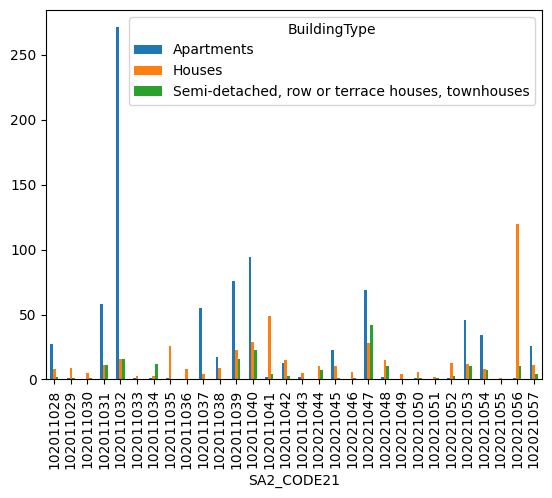

In [39]:
lga_df.groupby(["SA2_CODE21","BuildingType"]).Additions.max().unstack().plot(kind='bar')

# Mean

<Axes: xlabel='SA2_CODE21'>

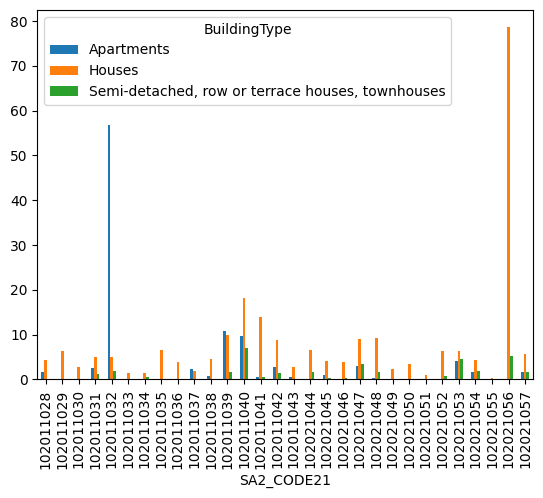

In [40]:
lga_df.groupby(["SA2_CODE21","BuildingType"]).Additions.mean().unstack().plot(kind='bar')

# Number of Dwellings in different region 

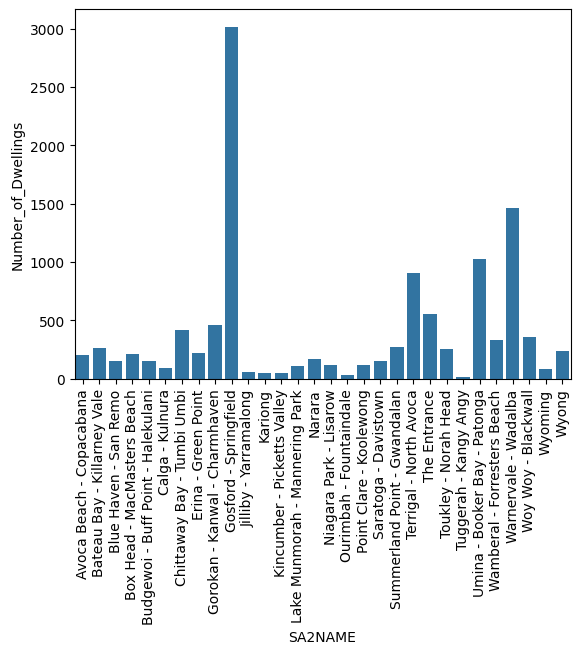

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('central-coast (1).xlsx', sheet_name='SA2 Approvals')

df_cleaned = df.dropna()

grouped_df = df_cleaned.groupby('SA2NAME')['Number_of_Dwellings'].sum().reset_index()

grouped_df['Dwelling_Percent'] = (grouped_df['Number_of_Dwellings'] / grouped_df['Number_of_Dwellings'].sum()) * 100

sns.barplot(x='SA2NAME', y='Number_of_Dwellings', data=grouped_df)
plt.xticks(rotation=90)
plt.show()

grouped_df.to_excel('grouped_data.xlsx', index=False)

In [42]:
import pandas as pd


region_type_aggregation = df.groupby(['SA2NAME', 'Type_of_Building'])['Number_of_Dwellings'].sum().reset_index()


print(region_type_aggregation.head())

                    SA2NAME           Type_of_Building  Number_of_Dwellings
0  Avoca Beach - Copacabana  Alterations and Additions                    2
1  Avoca Beach - Copacabana     Apartments 1-2 storeys                    0
2  Avoca Beach - Copacabana       Apartments 3 storeys                    0
3  Avoca Beach - Copacabana     Apartments 4-8 storeys                   49
4  Avoca Beach - Copacabana      Apartments 9+ storeys                    0


# Number of dwellings by region and type

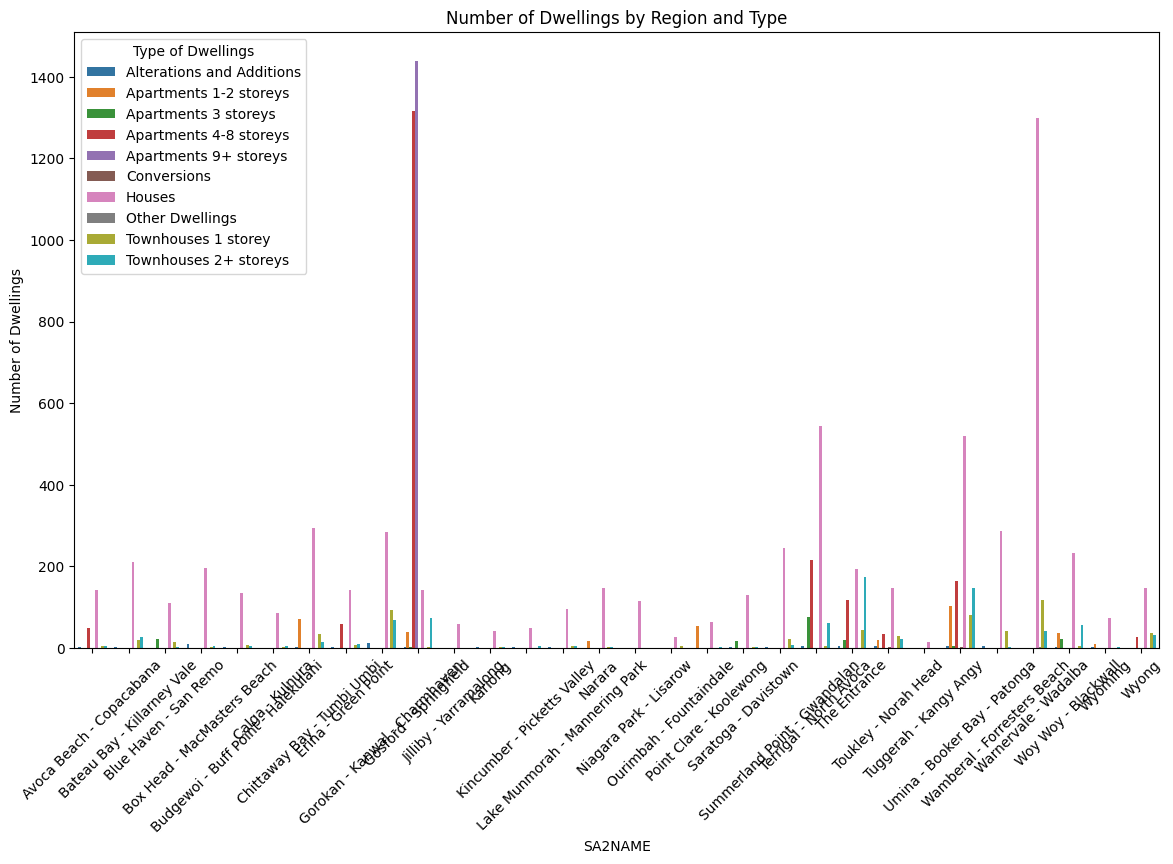

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.barplot(x='SA2NAME', y='Number_of_Dwellings', hue='Type_of_Building', data=region_type_aggregation)
plt.title('Number of Dwellings by Region and Type')
plt.xlabel('SA2NAME')
plt.ylabel('Number of Dwellings')
plt.xticks(rotation=45)
plt.legend(title='Type of Dwellings')
plt.show()

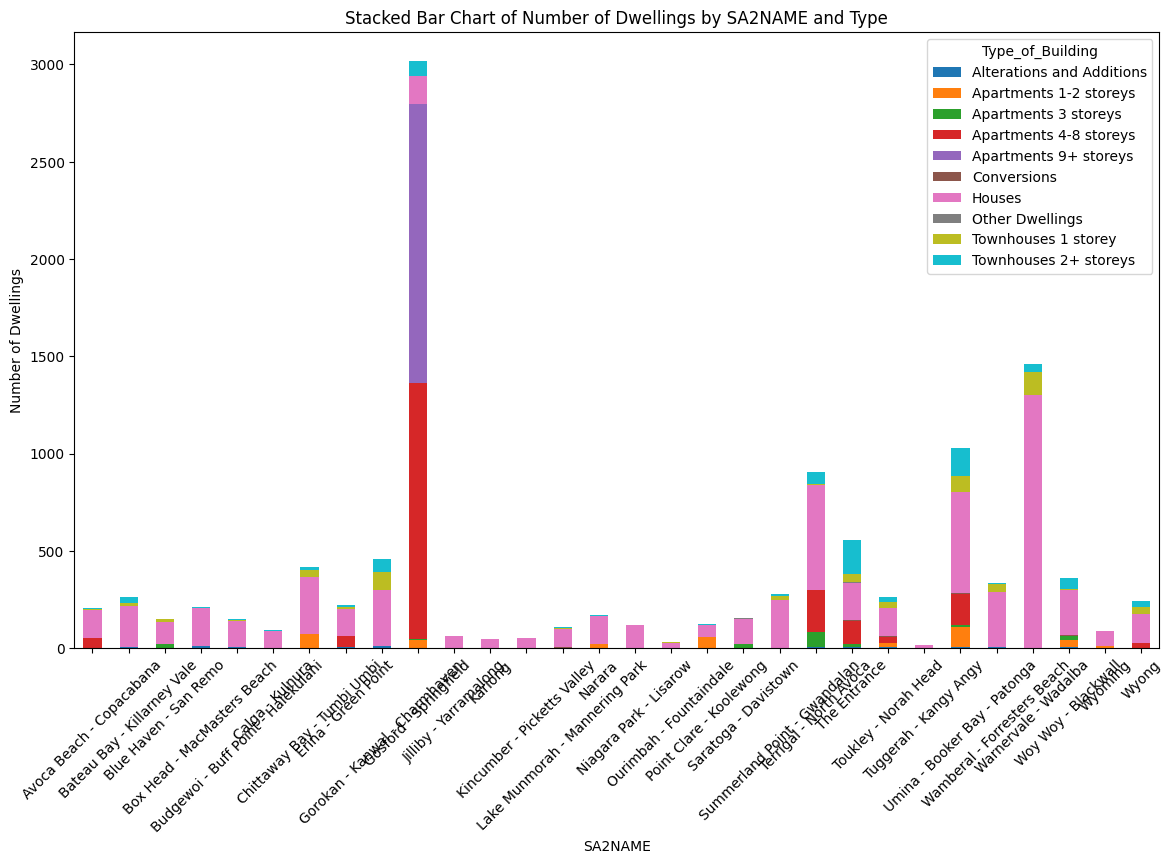

In [44]:
pivot_table = region_type_aggregation.pivot(index='SA2NAME', columns='Type_of_Building', values='Number_of_Dwellings')
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Stacked Bar Chart of Number of Dwellings by SA2NAME and Type')
plt.xlabel('SA2NAME')
plt.ylabel('Number of Dwellings')
plt.xticks(rotation=45)
plt.show()

# Number of Dwelling Over time 

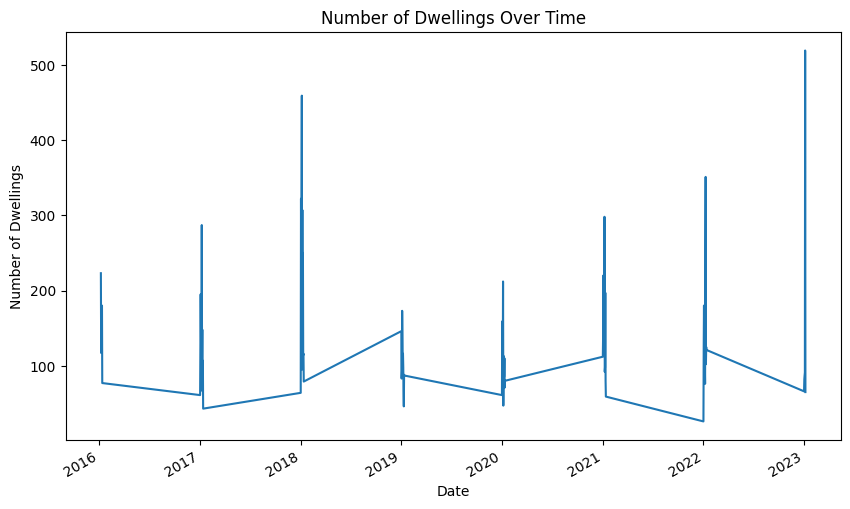

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


df['Date'] = pd.to_datetime(df['Date'])


time_series_data = df.groupby('Date')['Number_of_Dwellings'].sum()


plt.figure(figsize=(10, 6))
time_series_data.plot()
plt.title('Number of Dwellings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Dwellings')
plt.show()

# Number of dwellings by type

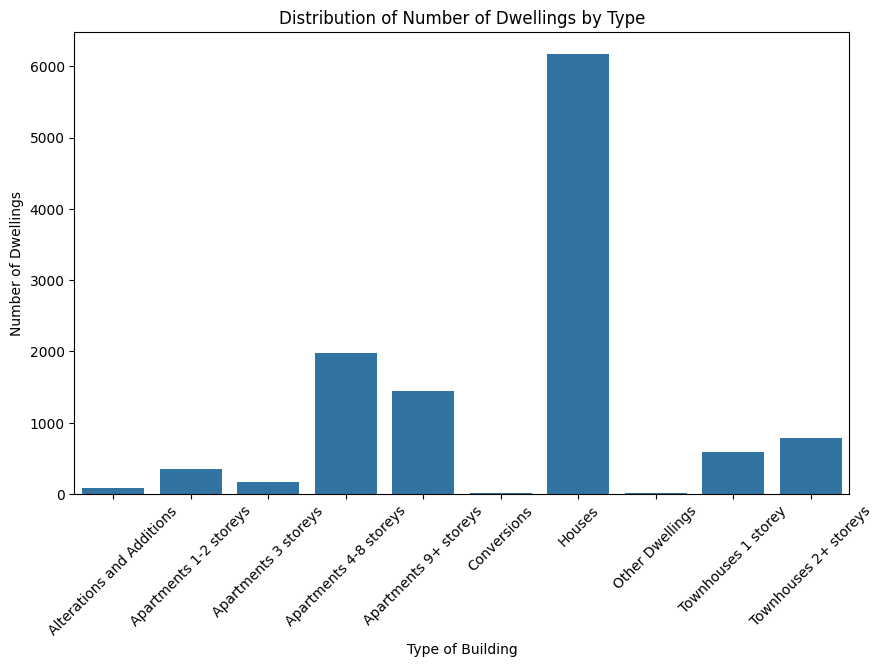

In [46]:
import seaborn as sns


distribution_data = df.groupby('Type_of_Building')['Number_of_Dwellings'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Type_of_Building', y='Number_of_Dwellings', data=distribution_data)
plt.title('Distribution of Number of Dwellings by Type')
plt.xlabel('Type of Building')
plt.ylabel('Number of Dwellings')
plt.xticks(rotation=45)
plt.show()


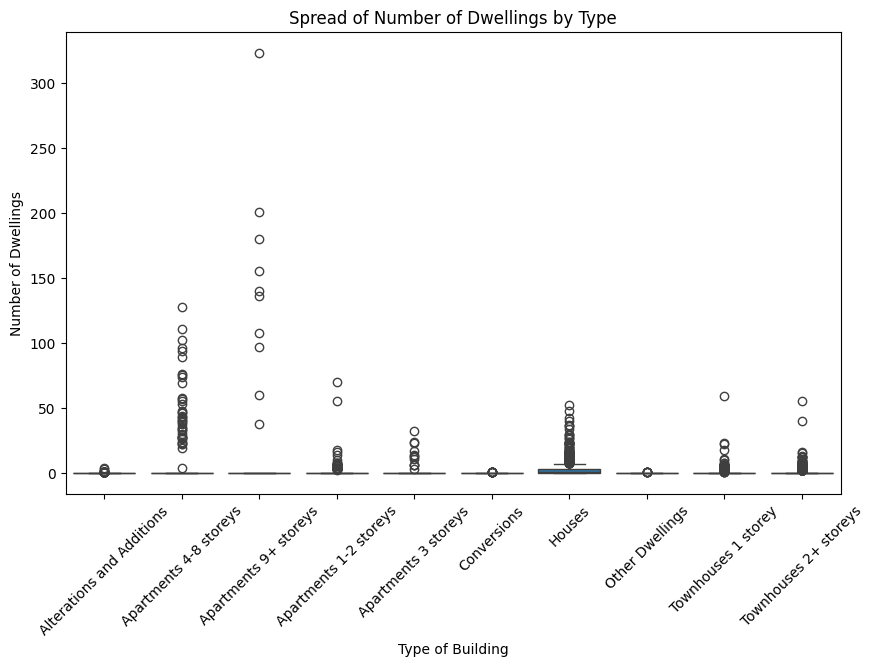

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_Building', y='Number_of_Dwellings', data=df)
plt.title('Spread of Number of Dwellings by Type')
plt.xlabel('Type of Building')
plt.ylabel('Number of Dwellings')
plt.xticks(rotation=45)
plt.show()

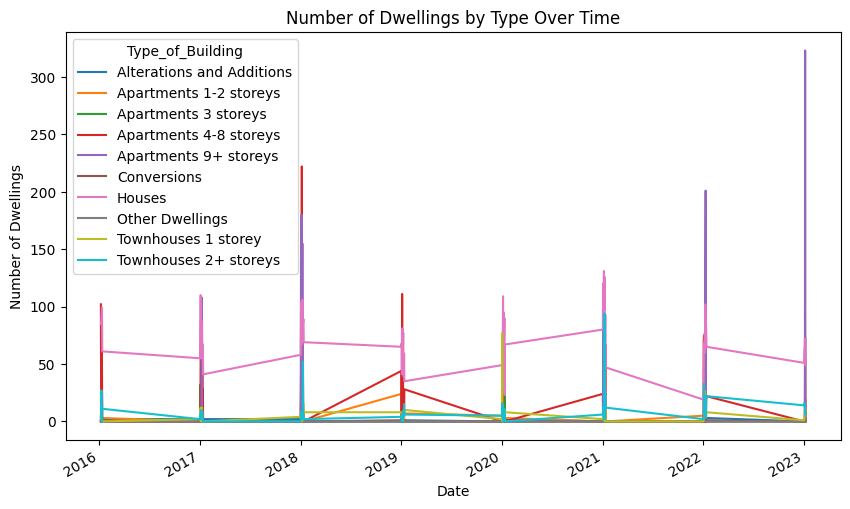

In [48]:
correlation_data = df.groupby(['Date', 'Type_of_Building'])['Number_of_Dwellings'].sum().unstack()


correlation_data.plot(figsize=(10, 6))
plt.title('Number of Dwellings by Type Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Dwellings')
plt.show()

# Thank you for watching